# Do Univariate Stats on the Tree Data Set

Imports

In [22]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt

Import the Data as Pandas Dataframe

In [3]:
tree = pd.read_csv("../data/TreeWeight.csv")

In [5]:
tree

,RootStock,TrunkGirth,Weight
0,I,358,760
1,I,375,821
2,I,393,928
3,I,394,1009
4,I,360,766
...,...,...,...
99,XVI,460,1751
100,XVI,464,1937
101,XVI,457,1823
102,XVI,463,1838


Describe does basic stats

In [6]:
tree.describe()

,TrunkGirth,Weight
count,104.000000,104.000000
mean,396.307692,1102.423077
std,71.152111,456.127892
min,205.000000,251.000000
25%,362.750000,770.500000
50%,405.000000,1075.500000
75%,450.250000,1401.500000
max,527.000000,2508.000000


Both Means

In [7]:
tree.mean()

TrunkGirth     396.307692
Weight        1102.423077
dtype: float64

Row 0

In [8]:
tree.iloc[0]

RootStock       I
TrunkGirth    358
Weight        760
Name: 0, dtype: object

Row 1

In [25]:
tree.iloc[1]

RootStock       I
TrunkGirth    375
Weight        821
Name: 1, dtype: object

Rows 4-10 Remeber starts at 0

In [29]:
tree.iloc[4:10]

,RootStock,TrunkGirth,Weight
4,I,360,766
5,I,351,726
6,I,398,1209
7,I,362,750
8,II,409,1036
9,II,406,1094


Columns sliced

In [34]:
tree.iloc[:,0]

0        I
1        I
2        I
3        I
4        I
      ... 
99     XVI
100    XVI
101    XVI
102    XVI
103    XVI
Name: RootStock, Length: 104, dtype: object

In [35]:
tree.iloc[:,1]

0      358
1      375
2      393
3      394
4      360
      ... 
99     460
100    464
101    457
102    463
103    473
Name: TrunkGirth, Length: 104, dtype: int64

In [36]:
tree.iloc[:,2]

0       760
1       821
2       928
3      1009
4       766
       ... 
99     1751
100    1937
101    1823
102    1838
103    1817
Name: Weight, Length: 104, dtype: int64

Mean Weight:

In [40]:
tree["Weight"].mean()

1102.423076923077

Medians of each (as a list):

In [46]:
[tree["TrunkGirth"].median(), tree["Weight"].median()]

[405.0, 1075.5]

In [47]:
tree.std()

TrunkGirth     71.152111
Weight        456.127892
dtype: float64

Sanity Check:

In [49]:
tree.describe()

,TrunkGirth,Weight
count,104.000000,104.000000
mean,396.307692,1102.423077
std,71.152111,456.127892
min,205.000000,251.000000
25%,362.750000,770.500000
50%,405.000000,1075.500000
75%,450.250000,1401.500000
max,527.000000,2508.000000


In [60]:
tree_dict = {
    "Trunk" : {
        "Mean" : tree["TrunkGirth"].mean(),
        "Standard Deviation" : tree["TrunkGirth"].std(),
        "Median" : tree["TrunkGirth"].median()
        },
    "Weight" : {
        "Mean" : tree["Weight"].mean(),
        "Standard Deviation" : tree["Weight"].std(),
        "Median" : tree["Weight"].median()
        }
    }

In [61]:
print(tree_dict)

{'Trunk': {'Mean': 396.3076923076923, 'Standard Deviation': 71.15211067055762, 'Median': 405.0}, 'Weight': {'Mean': 1102.423076923077, 'Standard Deviation': 456.1278923937527, 'Median': 1075.5}}


Get Stats For Trunk

In [64]:
tree_dict.get("Trunk")

{'Mean': 396.3076923076923,
 'Standard Deviation': 71.15211067055762,
 'Median': 405.0}

Loop Through Dictionary

In [67]:
for var in tree_dict:
    print(var)

Trunk
Weight


In [73]:
for stat in tree_dict.values():
    print(stat)

{'Mean': 396.3076923076923, 'Standard Deviation': 71.15211067055762, 'Median': 405.0}
{'Mean': 1102.423076923077, 'Standard Deviation': 456.1278923937527, 'Median': 1075.5}


In [74]:
for var, stat in tree_dict.items():
  print(var, stat)

Trunk {'Mean': 396.3076923076923, 'Standard Deviation': 71.15211067055762, 'Median': 405.0}
Weight {'Mean': 1102.423076923077, 'Standard Deviation': 456.1278923937527, 'Median': 1075.5}


In [75]:
tree_dict.keys()

dict_keys(['Trunk', 'Weight'])

Quantiles

In [9]:
tree.quantile() #Default 50%

TrunkGirth     405.0
Weight        1075.5
Name: 0.5, dtype: float64

In [10]:
tree.quantile(.3) # 30%

TrunkGirth    375.0
Weight        821.0
Name: 0.3, dtype: float64

Missing Stats

In [11]:
tree.isnull()

,RootStock,TrunkGirth,Weight
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
99,False,False,False
100,False,False,False
101,False,False,False
102,False,False,False


In [12]:
tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RootStock   104 non-null    object
 1   TrunkGirth  104 non-null    int64 
 2   Weight      104 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.6+ KB


Confidence intervals:

In [18]:
st.t.interval(.95, len(tree)-1, loc = np.mean(tree))

(array([ 394.32442816, 1100.43981278]), array([ 398.29095645, 1104.40634107]))

Boxplot

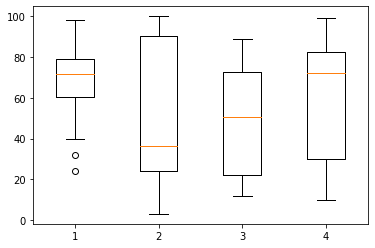

In [23]:
value1 = [82,76,24,40,67,62,75,78,71,32,98,89,78,67,72,82,87,66,56,52]
value2=[62,5,91,25,36,32,96,95,3,90,95,32,27,55,100,15,71,11,37,21]
value3=[23,89,12,78,72,89,25,69,68,86,19,49,15,16,16,75,65,31,25,52]
value4=[59,73,70,16,81,61,88,98,10,87,29,72,16,23,72,88,78,99,75,30]
 
box_plot_data=[value1,value2,value3,value4]
plt.boxplot(box_plot_data)
plt.show()

In [30]:
tree["Weight"]

0       760
1       821
2       928
3      1009
4       766
       ... 
99     1751
100    1937
101    1823
102    1838
103    1817
Name: Weight, Length: 104, dtype: int64

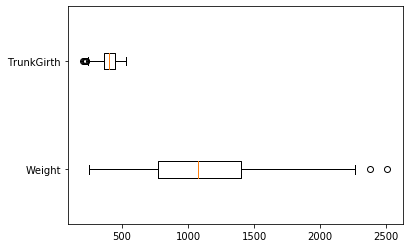

In [37]:
box_plot_data=[tree["Weight"],tree["TrunkGirth"]]
plt.boxplot(box_plot_data, labels = ["Weight","TrunkGirth"], vert = False)
plt.show()